In [128]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_csv = pd.read_csv(city_data_to_load)
ride_data_csv = pd.read_csv(ride_data_to_load)
ride_data_csv
# Combine the data into a single dataset
complete_data = pd.merge(ride_data_csv, city_data_csv, how="outer")
# Display the data table for preview
complete_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [40]:
# Obtain the x and y coordinates for each of the three city types
urban_data = complete_data.loc[(complete_data["type"] == "Urban")]
urban_x = urban_data.groupby("city").count()["ride_id"]
urban_y = urban_data.groupby("city").mean()["fare"]
urban_s = (urban_data.groupby("city").mean()["driver_count"])*10

In [44]:
suburban_data = complete_data.loc[(complete_data["type"] == "Suburban")]
suburban_x = suburban_data.groupby("city").count()["ride_id"]
suburban_y = suburban_data.groupby("city").mean()["fare"]
suburban_s = (suburban_data.groupby("city").mean()["driver_count"])*10

In [45]:
rural_data = complete_data.loc[(complete_data["type"] == "Rural")]
rural_x = rural_data.groupby("city").count()["ride_id"]
rural_y = rural_data.groupby("city").mean()["fare"]
rural_s = (rural_data.groupby("city").mean()["driver_count"])*10

## Bubble Plot of Ride Sharing Data

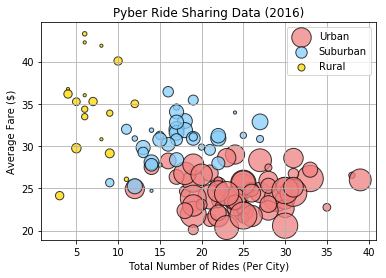

In [65]:
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=urban_s, facecolor = "lightcoral", edgecolor="black", label="Urban", alpha=0.75)
plt.scatter(suburban_x, suburban_y, s=suburban_s, facecolor = "lightskyblue", edgecolor="black",label="Suburban", alpha=0.75)
plt.scatter(rural_x, rural_y, s=rural_s, facecolor = "gold", edgecolor="black", label="Rural", alpha=0.75)

# Incorporate the other graph properties

# Create a legend
plt.legend(loc="best")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Incorporate a text label regarding circle size

# Save Figure


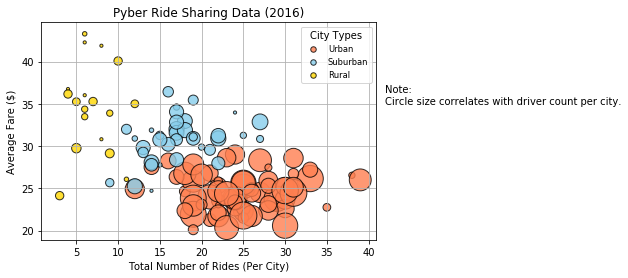

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

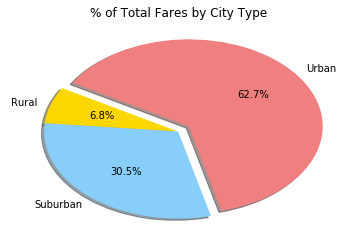

In [86]:
# Calculate Type Percents
fare_by_type = complete_data.groupby("type").sum()["fare"]
total_fare = complete_data.sum()["fare"]
type_percents = (fare_by_type / total_fare) * 100
colors = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(
    type_percents, 
    startangle=150, 
    shadow=True, 
    labels=type_percents.index, 
    explode=[0,0,0.1], 
    autopct="%1.1f%%", colors=colors)
plt.title("% of Total Fares by City Type")
# Save Figure


## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x1b37c1f87f0>,
 [Text(-1.03016,0.385701,'Rural'),
  Text(-0.886342,-0.651459,'Suburban'),
  Text(1.07071,0.54184,'Urban')],
 [Text(-0.561907,0.210383,'5.3%'),
  Text(-0.483459,-0.355341,'26.3%'),
  Text(0.624578,0.316073,'68.4%')])

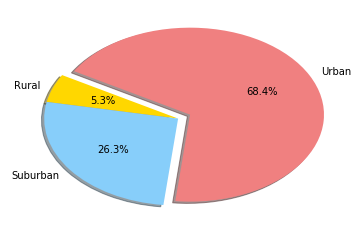

In [100]:
# Calculate Ride Percents
ride_by_type = complete_data.groupby("type").count()["ride_id"]
total_rides = complete_data.count()["ride_id"]
ride_percents = ride_by_type / total_rides * 100
# Build Pie Chart
plt.pie(
    ride_percents, 
    colors=colors, 
    labels=ride_percents.index, 
    startangle=150, 
    autopct="%1.1f%%", 
    explode=[0,0,0.1], 
    shadow=True)
# Save Figure


## Total Drivers by City Type

In [134]:
# Calculate Driver Percents
#driver_by_type = complete_data.groupby(["type","city"]).mean()["driver_count"]
#driver_by_type
driver_count = urban_data.groupby("city").mean()["driver_count"]

#urban_drivers = driver_by_type.loc[(driver_by_type["type"] == "Urban")]
# Build Pie Charts

# Save Figure


dtype('float64')

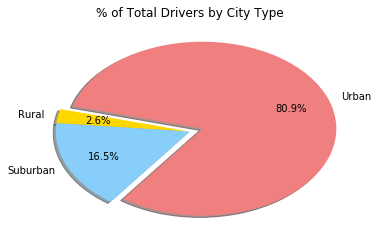

In [6]:
# Show Figure
plt.show()